# Draw multidimensional functions, distributions and events

This example shows how to represent multidimensional functions, distributions and events. When 2D plots are to draw, contours are used. We use 2D cross-sections to represent multidimensional objects when required, which leads to cross-cuts representations. 

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb
import openturns.viewer as otv
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
problem = otb.ReliabilityProblem33()

In [3]:
event = problem.getEvent()
g = event.getFunction()

## Compute the bounds of the domain

In [4]:
inputVector = event.getAntecedent()
distribution = inputVector.getDistribution()

In [5]:
inputDimension = distribution.getDimension()
inputDimension

3

In [6]:
alpha = 1 - 1.0e-5

bounds, marginalProb = distribution.computeMinimumVolumeIntervalWithMarginalProbability(
    alpha
)

In [7]:
referencePoint = distribution.getMean()
referencePoint

class=Point name=Unnamed dimension=3 values=[0,0,0]

/home/osboxes/Documents/venvbbrc/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


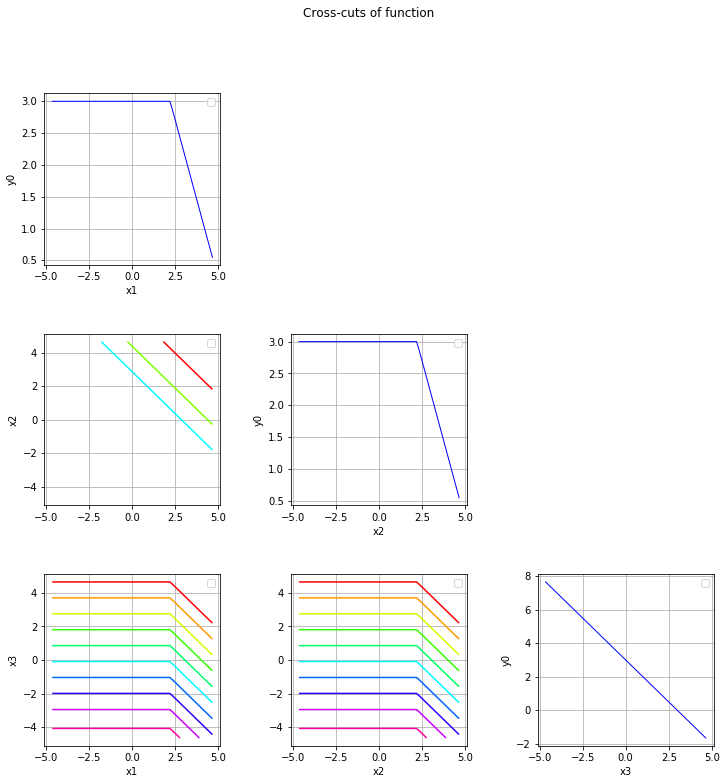

In [8]:
crossCut = otb.CrossCutFunction(g, referencePoint)
fig = crossCut.draw(bounds)
# Remove the legend labels because there
# are too many for such a small figure
for ax in fig.axes:
    ax.legend("")
# Increase space between sub-figures so that
# there are no overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)

## Plot cross-cuts of the distribution

In [9]:
crossCut = otb.CrossCutDistribution(distribution)

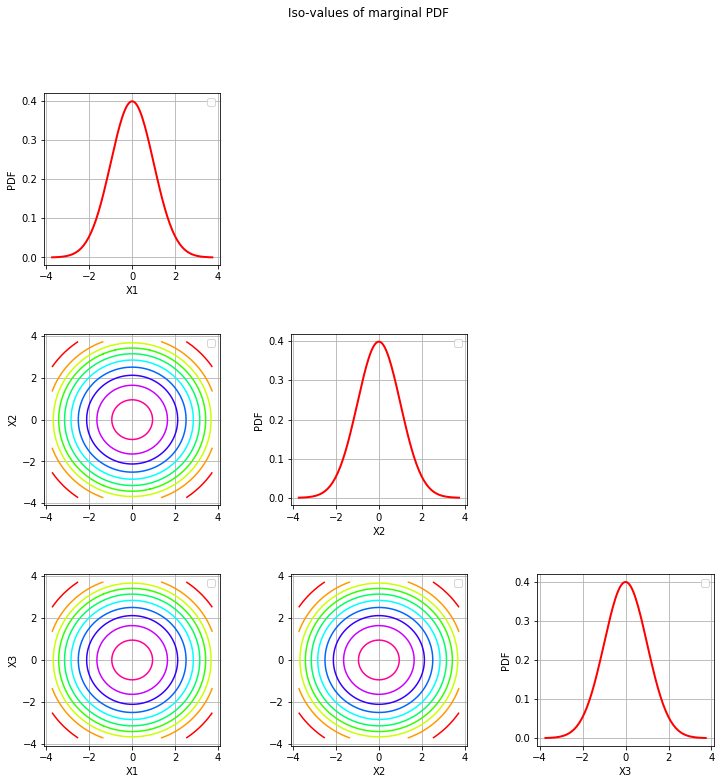

In [10]:
fig = crossCut.drawMarginalPDF()
# Remove the legend labels because there
# are too many for such a small figure
for ax in fig.axes:
    ax.legend("")
# Increase space between sub-figures so that
# there are no overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)

The correct way to represent cross-cuts of a distribution is to draw the contours of the PDF of the conditional distribution.

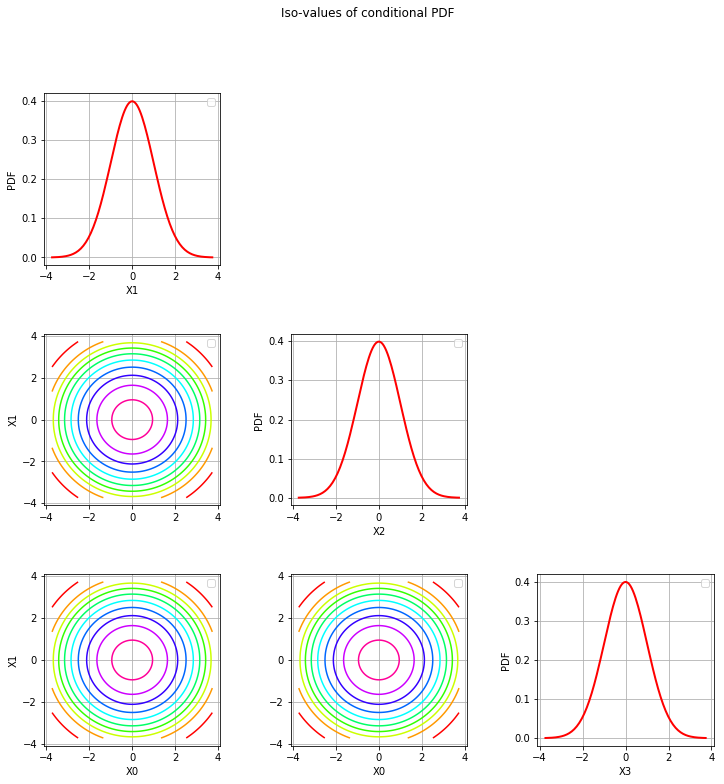

In [11]:
fig = crossCut.drawConditionalPDF(referencePoint)
# Remove the legend labels because there
# are too many for such a small figure
for ax in fig.axes:
    ax.legend("")
# Increase space between sub-figures so that
# there are no overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)

In [12]:
inputVector = event.getAntecedent()
event = problem.getEvent()
g = event.getFunction()

In [13]:
drawEvent = otb.DrawEvent(event)

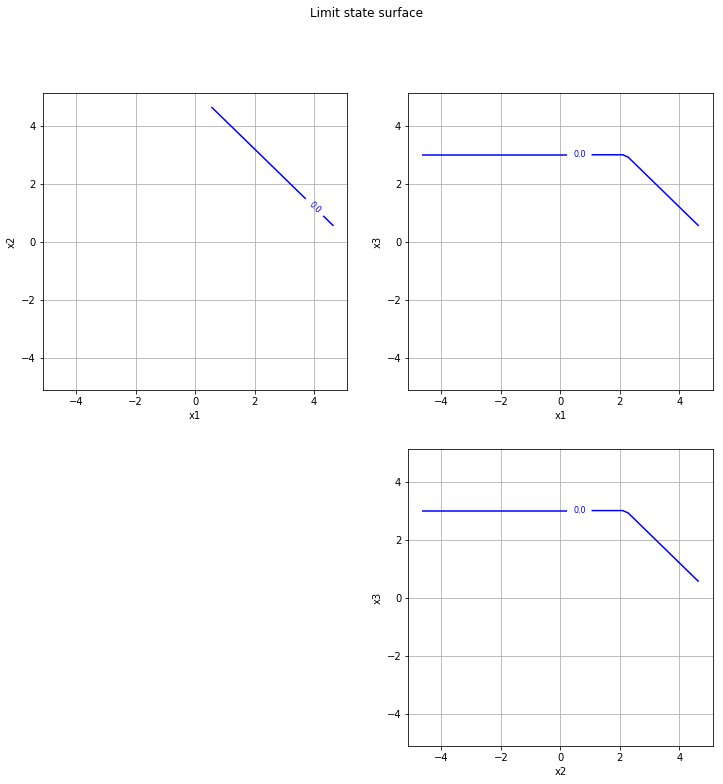

In [14]:
_ = drawEvent.drawLimitState(bounds)

In the following figure, we present the cross-cuts of samples with size equal to 500. These are three different samples, each of which is plotted with the `drawSampleCrossCut` method. For each cross-cut plot (i,j), the current implementation uses the marginal bivariate distribution, then generates a sample from this distribution. A more rigorous method would draw the conditional distribution, but this might reduce the performance in general. See https://github.com/mbaudin47/otbenchmark/issues/47 for details.


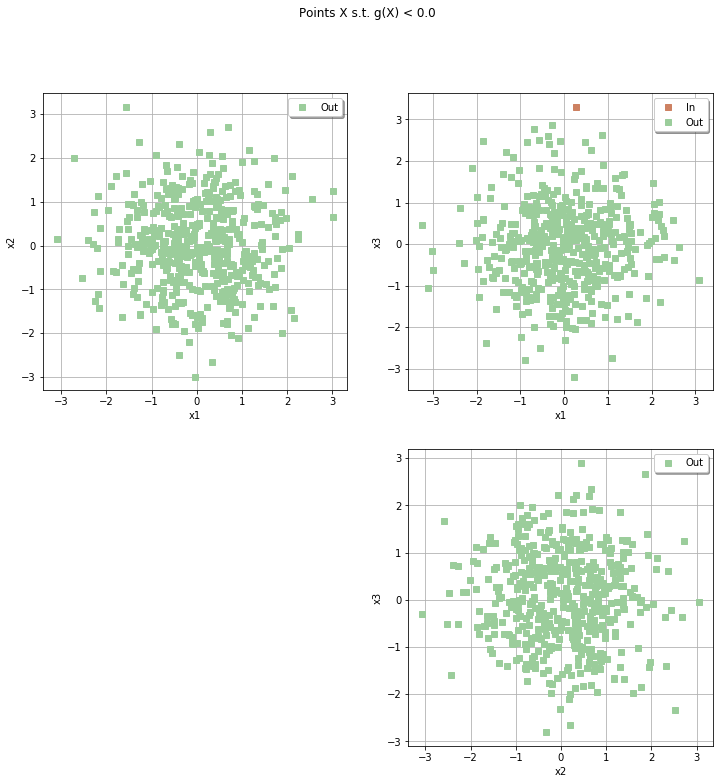

In [15]:
sampleSize = 500
_ = drawEvent.drawSample(sampleSize)

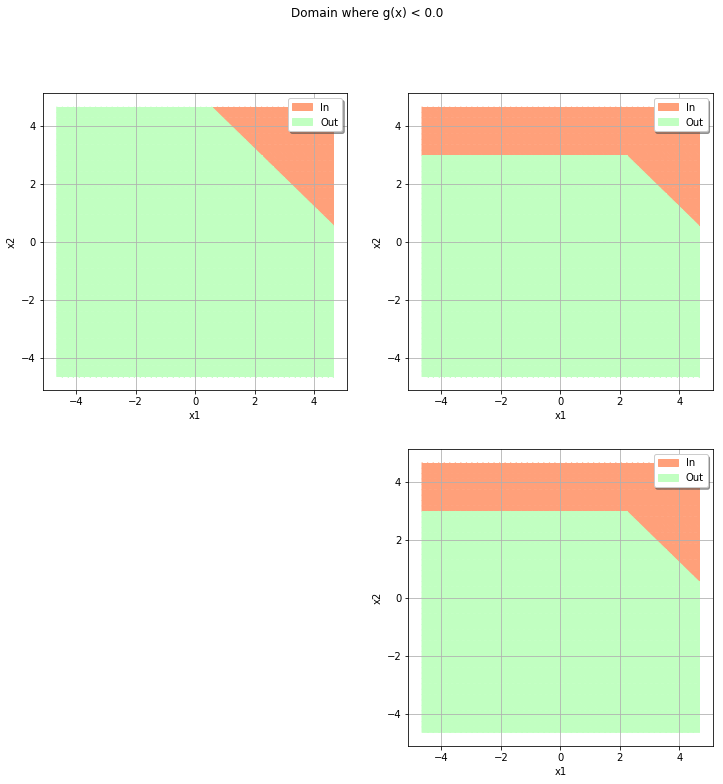

In [16]:
_ = drawEvent.fillEvent(bounds)